In [1]:
# model_notebook.ipynb
import pandas as pd
import sys
sys.path.append('../scripts') 
from model import(
    preprocess_data, split_data, train_linear_regression, train_decision_tree,
    train_random_forest, train_xgboost, evaluate_model, feature_importance,handle_missing_data)

# Load data
df = pd.read_csv("../Data/Data.csv")


# Drop one  columns
df = df.drop(columns=["NumberOfVehiclesInFleet"])# since it isn null columne 


c:\Users\User\Desktop\Week3-insurance-Data-Analysis\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\User\AppData\Local\Temp\ipykernel_24924\1328185501.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/Data.csv")


In [2]:
# Add derived features
import numpy as np

df['Margin'] = df['TotalPremium'] - df['TotalClaims']
df['Claim_to_Premium_Ratio'] = df['TotalClaims'] / (df['TotalPremium'] + 1)  # Avoid division by zero
df['Log_Premium'] = np.log1p(df['TotalPremium'])
df['Log_Tota_Claims'] = np.log1p(df['TotalClaims'])
df.columns



c:\Users\User\Desktop\Week3-insurance-Data-Analysis\myenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\User\Desktop\Week3-insurance-Data-Analysis\myenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'Margin',
       'Claim_to_Premium_Ratio', 'Log_Premium', 'Log_Tota_Claims'],
      dtype='object')

In [3]:
# Encode categorical features
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Encode Gender
df = pd.get_dummies(df, columns=['Province', 'PostalCode'], drop_first=True)  # One-hot encode categorical variables

df= handle_missing_data(df)


c:\Users\User\Desktop\Week3-insurance-Data-Analysis\notebook\../scripts\model.py:157: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
c:\Users\User\Desktop\Week3-insurance-Data-Analysis\notebook\../scripts\model.py:168: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [4]:
# # Define features and target
# X = df.select_dtypes(include=['number']).drop(columns=['TotalClaims'])
# y = df['TotalClaims']



# Train-Test Split
target_columns = "TotalClaims"
X_train, X_test, y_train, y_test = split_data(df, target_columns)

X_train

,UnderwrittenCoverID,PolicyID,Gender,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,TotalPremium,Margin,Claim_to_Premium_Ratio,Log_Premium,Log_Tota_Claims
448476,74460,6214,0.136266,60058415.0,2008,4.0,2694.0,111.0,4.0,225531.129942,7500.0,5.5017,4.826053,4.826053,0.0,1.762340,0.0
629423,18128,432,0.136266,11511300.0,2010,4.0,0.0,110.0,4.0,225531.129942,3500.0,1.7758,0.000000,0.000000,0.0,0.000000,0.0
293724,77518,4263,0.136266,60058419.0,2014,4.0,2694.0,111.0,4.0,225531.129942,7500.0,7.9523,0.000000,0.000000,0.0,0.000000,0.0
793115,154396,12620,0.136266,60058415.0,2006,4.0,2694.0,111.0,4.0,225531.129942,5000000.0,0.9228,0.000000,0.000000,0.0,0.000000,0.0
120459,83311,6862,0.136266,60058418.0,2010,4.0,2694.0,111.0,4.0,225531.129942,5000000.0,2.2044,1.933684,1.933684,0.0,1.076259,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,90224,7868,0.136266,60058419.0,2014,4.0,2694.0,111.0,4.0,225531.129942,5000000.0,2.6820,0.000000,0.000000,0.0,0.000000,0.0
365838,91581,6681,0.136266,60058418.0,2009,4.0,2694.0,111.0,4.0,225531.129942,5000.0,2.9195,2.560965,2.560965,0.0,1.270032,0.0
131932,85451,6731,0.136266,60056987.0,2007,4.0,2237.0,75.0,4.0,225531.129942,3500.0,1.2590,1.104386,1.104386,0.0,0.744024,0.0
671155,116795,8374,0.136266,60058407.0,2014,4.0,2494.0,75.0,4.0,225531.129942,7500.0,8.2587,7.244474,7.244474,0.0,2.109543,0.0


In [5]:
# Train Models
linear_model = train_linear_regression(X_train, y_train)



In [6]:
decision_tree_model = train_decision_tree(X_train, y_train)



In [7]:
random_forest_model = train_random_forest(X_train, y_train)


In [8]:
xgboost_model = train_xgboost(X_train, y_train)

In [9]:
# Evaluate Models
linear_eval = evaluate_model(linear_model, X_test, y_test)

In [10]:

decision_tree_eval = evaluate_model(decision_tree_model, X_test, y_test)


In [11]:
random_forest_eval = evaluate_model(random_forest_model, X_test, y_test)


In [12]:
xgboost_eval = evaluate_model(xgboost_model, X_test, y_test)

Linear Regression: {'R2': 1.0, 'MAE': 3.2141770660993907e-12, 'RMSE': np.float64(1.2054355538185467e-11)}
Decision Tree: {'R2': 0.999818993358995, 'MAE': 0.34230887963836076, 'RMSE': np.float64(29.740015352271904)}
Random Forest: {'R2': 0.9999207938778119, 'MAE': 0.22376759256530315, 'RMSE': np.float64(19.67312310287913)}
XGBoost: {'R2': 0.9978511400327905, 'MAE': 1.1209560682868394, 'RMSE': np.float64(102.47029615543114)}


100%|===================| 799370/800078 [24:11<00:01]        

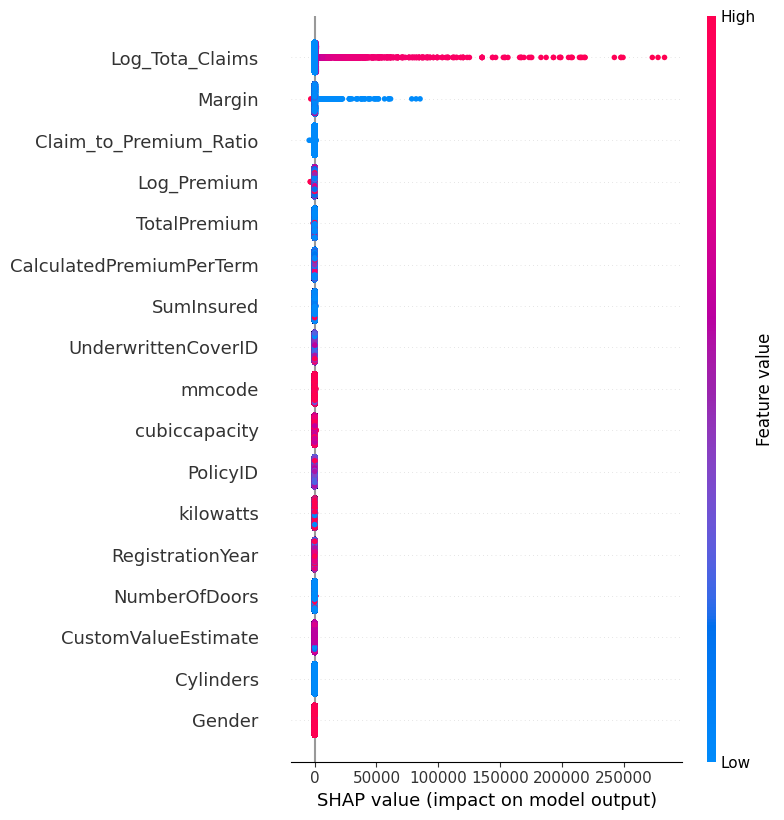

In [13]:
# Print Evaluation Results
print("Linear Regression:", linear_eval)
print("Decision Tree:", decision_tree_eval)
print("Random Forest:", random_forest_eval)
print("XGBoost:", xgboost_eval)

# Feature Importance (SHAP Analysis for the best model, e.g., Random Forest)
feature_importance(random_forest_model, X_train)

C:\Users\User\AppData\Local\Temp\ipykernel_24924\1158004018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Log_Tota_Claims', palette="coolwarm")


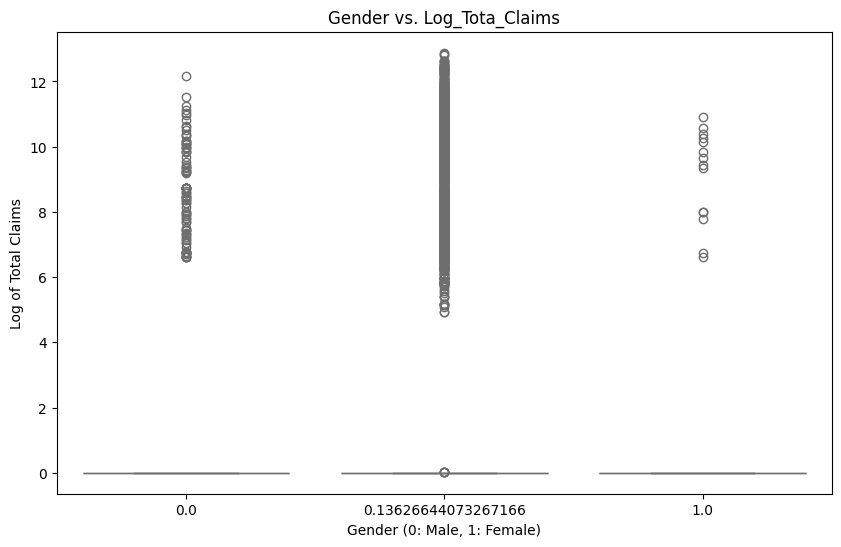

C:\Users\User\AppData\Local\Temp\ipykernel_24924\1158004018.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Margin', palette="coolwarm")


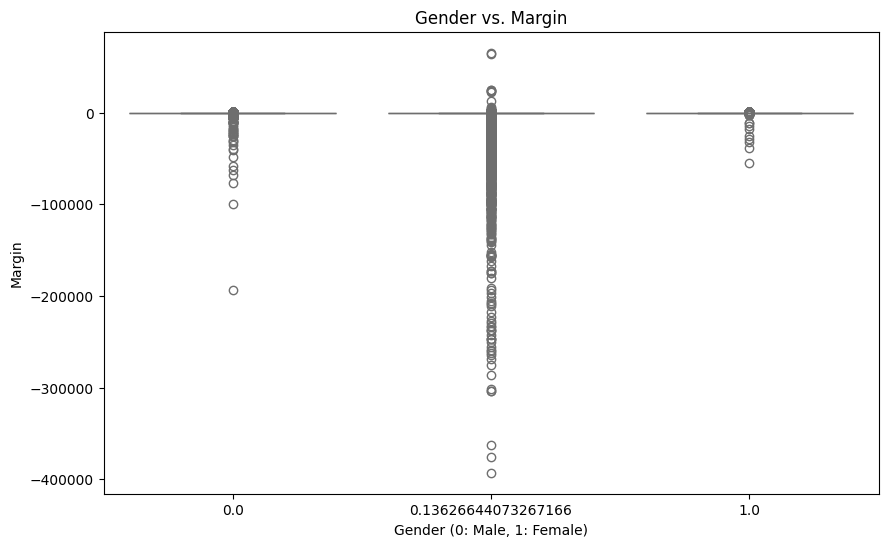

In [19]:
# Gender vs. Log_Total_Claims
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Log_Tota_Claims', palette="coolwarm")
plt.title("Gender vs. Log_Tota_Claims")
plt.xlabel("Gender (0: Male, 1: Female)")
plt.ylabel("Log of Total Claims")
plt.show()

# Gender vs. Margin
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Margin', palette="coolwarm")
plt.title("Gender vs. Margin")
plt.xlabel("Gender (0: Male, 1: Female)")
plt.ylabel("Margin")
plt.show()


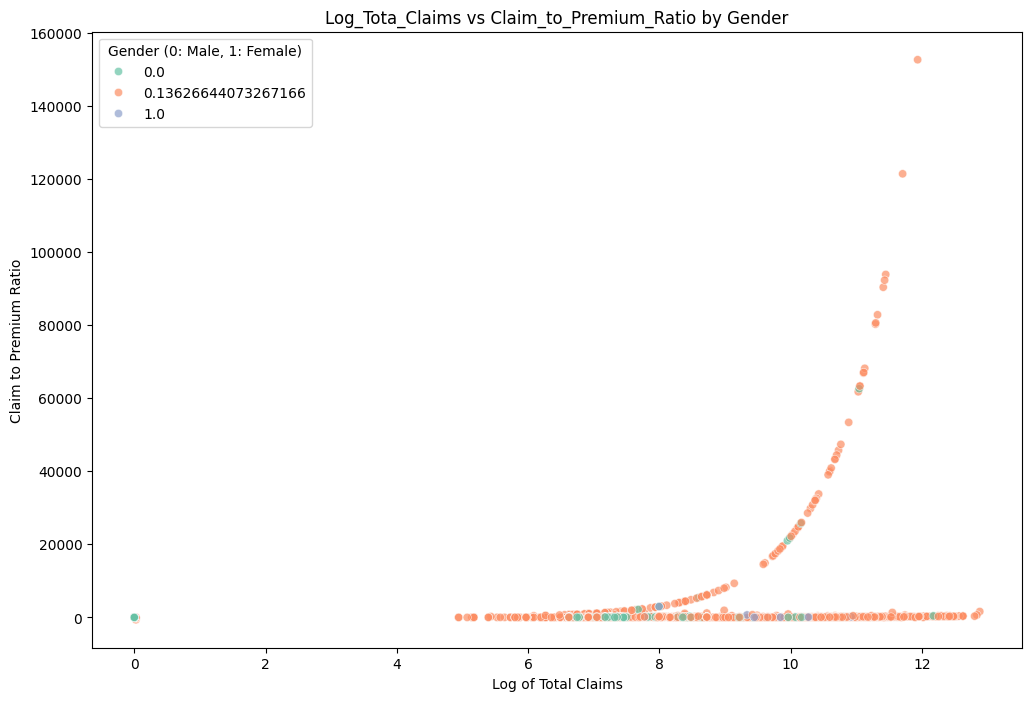

In [20]:
# Scatterplot for Log_Total_Claims vs Claim_to_Premium_Ratio by Gender
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Log_Tota_Claims', y='Claim_to_Premium_Ratio', hue='Gender', palette="Set2", alpha=0.7)
plt.title("Log_Tota_Claims vs Claim_to_Premium_Ratio by Gender")
plt.xlabel("Log of Total Claims")
plt.ylabel("Claim to Premium Ratio")
plt.legend(title="Gender (0: Male, 1: Female)")
plt.show()


In [34]:
# Aggregating Log_Tota_Claims vs Claim_to_Premium_Ratio by Gender
claim_data = df[['Log_Tota_Claims', 'Claim_to_Premium_Ratio', 'Gender']].groupby(['Log_Tota_Claims', 'Gender']).mean().reset_index()

# Display the aggregated data as a table
claim_data


,Log_Tota_Claims,Gender,Claim_to_Premium_Ratio
0,0.000000,0.000000,0.000000
1,0.000000,0.136266,0.000000
2,0.000000,1.000000,0.000000
3,0.024878,0.136266,-198.491454
4,4.941956,0.136266,0.362679
...,...,...,...
1634,12.625900,0.136266,371.504366
1635,12.626145,0.136266,358.738040
1636,12.803106,0.136266,340.838540
1637,12.838497,0.136266,667.886086


c:\Users\User\Desktop\Week3-insurance-Data-Analysis\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


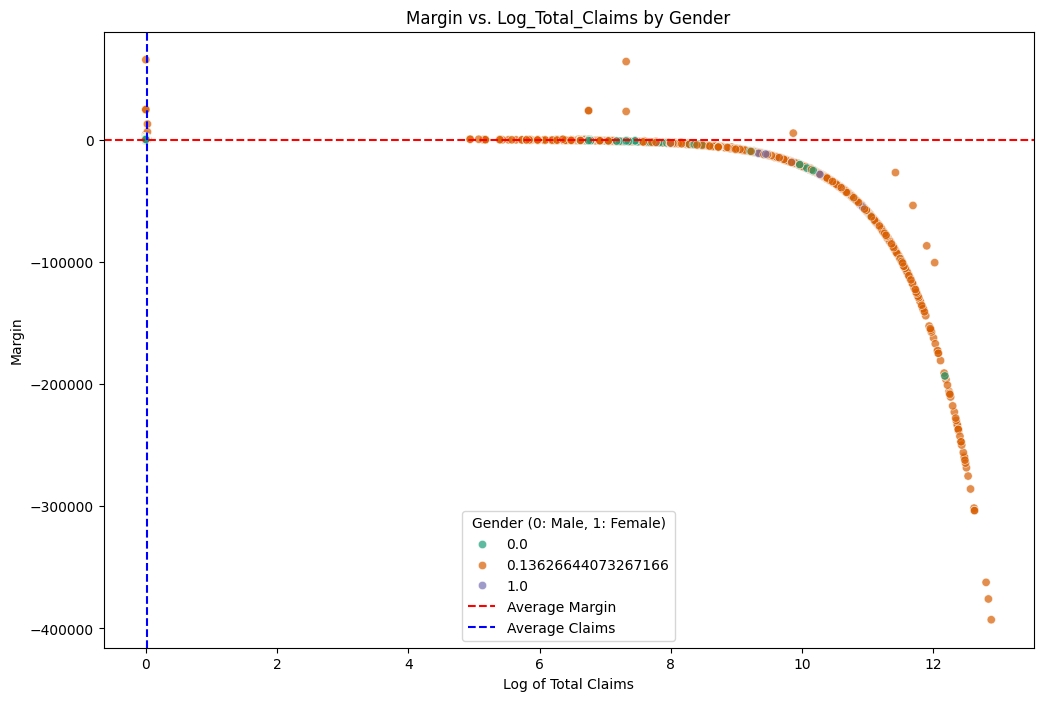

In [22]:
# Scatterplot for Margin vs Log_Total_Claims
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Log_Tota_Claims', y='Margin', hue='Gender', palette="Dark2", alpha=0.7)
plt.axhline(y=df['Margin'].mean(), color='red', linestyle='--', label="Average Margin")
plt.axvline(x=df['Log_Tota_Claims'].mean(), color='blue', linestyle='--', label="Average Claims")
plt.title("Margin vs. Log_Total_Claims by Gender")
plt.xlabel("Log of Total Claims")
plt.ylabel("Margin")
plt.legend(title="Gender (0: Male, 1: Female)")
plt.show()


In [33]:
# Aggregating margin by Log_Total_Claims and Gender to present the data in a table format
margin_data = df[['Log_Tota_Claims', 'Margin', 'Gender']].groupby(['Log_Tota_Claims', 'Gender']).mean().reset_index()

# Display the aggregated data as a table
margin_data


,Log_Tota_Claims,Gender,Margin
0,0.000000,0.000000,36.469308
1,0.000000,0.136266,62.016030
2,0.000000,1.000000,44.472933
3,0.024878,0.136266,3973.874193
4,4.941956,0.136266,243.349693
...,...,...,...
1634,12.625900,0.136266,-303520.451754
1635,12.626145,0.136266,-303565.827368
1636,12.803106,0.136266,-362278.393070
1637,12.838497,0.136266,-375869.873421


C:\Users\User\AppData\Local\Temp\ipykernel_24924\2109666707.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x=region_data.index, y='Log_Tota_Claims', palette="viridis")


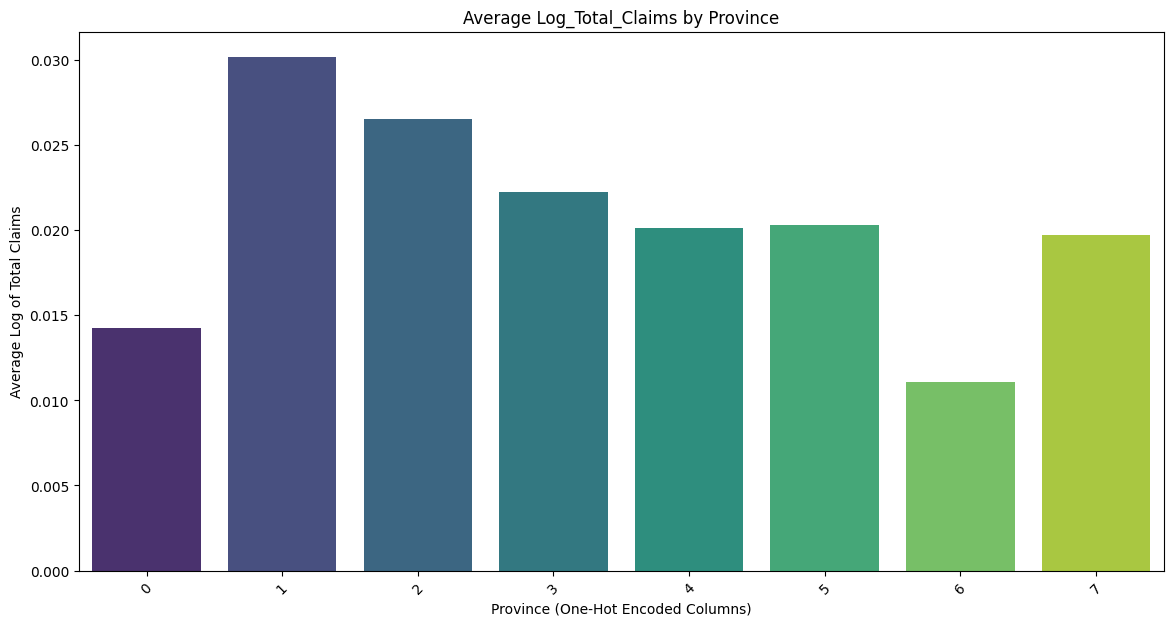

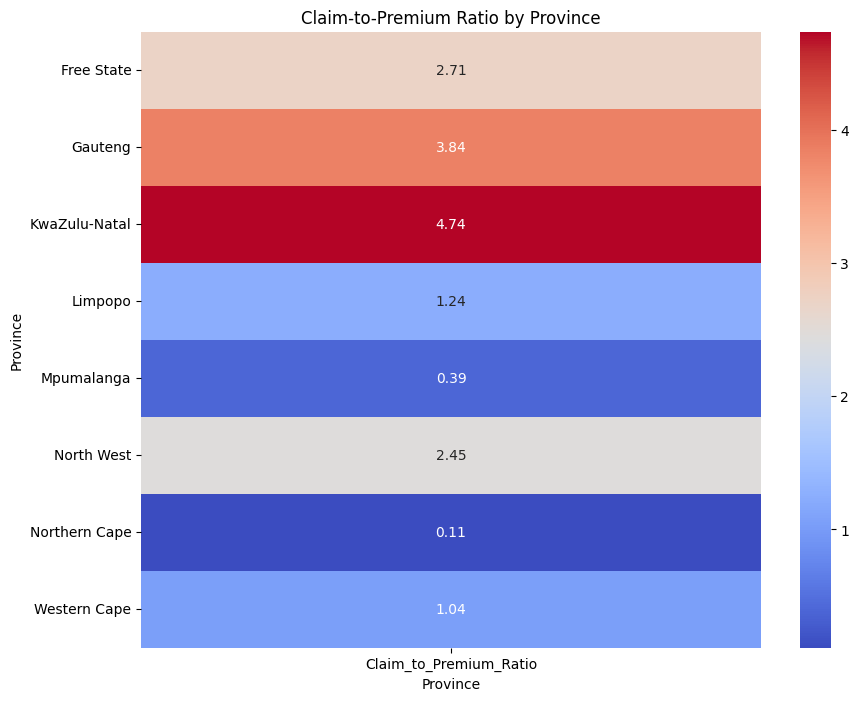

Average Log_Total_Claims by Province:


KeyError: "['Province'] not in index"

In [32]:
# Aggregating claims and premium by region (Province is now one-hot encoded)
province_cols = [col for col in df.columns if col.startswith('Province_')]
region_data = pd.concat([
    df[province_cols],
    df[['Log_Tota_Claims', 'Claim_to_Premium_Ratio']]
], axis=1).groupby(df[province_cols].idxmax(axis=1)).mean()

# Bar plot for Province vs. Average Claims
region_data.reset_index(drop=True, inplace=True)  # Reset index for better plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=region_data, x=region_data.index, y='Log_Tota_Claims', palette="viridis")
plt.title("Average Log_Total_Claims by Province")
plt.xlabel("Province (One-Hot Encoded Columns)")
plt.ylabel("Average Log of Total Claims")
plt.xticks(rotation=45)
plt.show()







# # Heatmap for regional claim-to-premium ratios
# heatmap_data = region_data.pivot_table(values='Claim_to_Premium_Ratio')
# sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Claim-to-Premium Ratio by Province")
# plt.xlabel("Province")
# plt.ylabel("Province")
# plt.show()
# Ensure you have a column that maps one-hot encoded provinces back to their original category
province_cols = [col for col in df.columns if col.startswith('Province_')]
df['Province'] = df[province_cols].idxmax(axis=1).str.replace('Province_', '')

# Create the pivot table
heatmap_data = df.pivot_table(
    values='Claim_to_Premium_Ratio', 
    index='Province', 
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Claim-to-Premium Ratio by Province")
plt.xlabel("Province")
plt.ylabel("Province")
plt.show()

# Display the relevant data in text form
print("Average Log_Total_Claims by Province:")
print(region_data[['Province', 'Log_Tota_Claims']].groupby('Province').mean().to_string(float_format="{:.2f}".format))


print("Claim-to-Premium Ratio by Province (Aggregated Data):")
print(heatmap_data.to_string(float_format="{:.2f}".format))

In [31]:
# Aggregating claims and premium by region (Province is now one-hot encoded)
province_cols = [col for col in df.columns if col.startswith('Province_')]
region_data = pd.concat([
    df[province_cols],
    df[['Log_Tota_Claims', 'Claim_to_Premium_Ratio']]
], axis=1).groupby(df[province_cols].idxmax(axis=1)).mean()

# Display the aggregated data as a table
region_data.reset_index(drop=True, inplace=True)  # Reset index for better table view
region_data


,Province_Free State,Province_Gauteng,Province_KwaZulu-Natal,Province_Limpopo,Province_Mpumalanga,Province_North West,Province_Northern Cape,Province_Western Cape,Log_Tota_Claims,Claim_to_Premium_Ratio
0,0.210719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014241,2.711284
1,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030152,3.842191
2,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.026517,4.735988
3,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022247,1.235793
4,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.020111,0.394116
5,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.020312,2.453431
6,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.011068,0.113167
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.019683,1.042654
